<h1>자전거 대여 시스템</h1>


<h3>환경설정</h3>

In [6]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import platform 
import os # 캐시 삭제를 위해 os 모듈 추가

# 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # 또는 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

cache_path = mpl.get_cachedir()
print(f"Matplotlib 캐시 경로: {cache_path}")

# 캐시 디렉토리 내의 모든 파일 삭제 (매우 중요!)
if os.path.exists(cache_path):
    import shutil
    shutil.rmtree(cache_path)
    print("Matplotlib 폰트 캐시가 삭제되었습니다.")
else:
    print("Matplotlib 캐시 디렉토리가 존재하지 않습니다.")





Matplotlib 캐시 경로: /Users/jeongheum/.matplotlib
Matplotlib 폰트 캐시가 삭제되었습니다.


<h3>데이터 구조 파악</h3>

In [7]:
train = pd.read_csv("data/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB



--- 추출된 시간 특성 (상위 5개) ---
             datetime  hour  dayofweek  month
0 2011-01-01 00:00:00     0          5      1
1 2011-01-01 01:00:00     1          5      1
2 2011-01-01 02:00:00     2          5      1
3 2011-01-01 03:00:00     3          5      1
4 2011-01-01 04:00:00     4          5      1


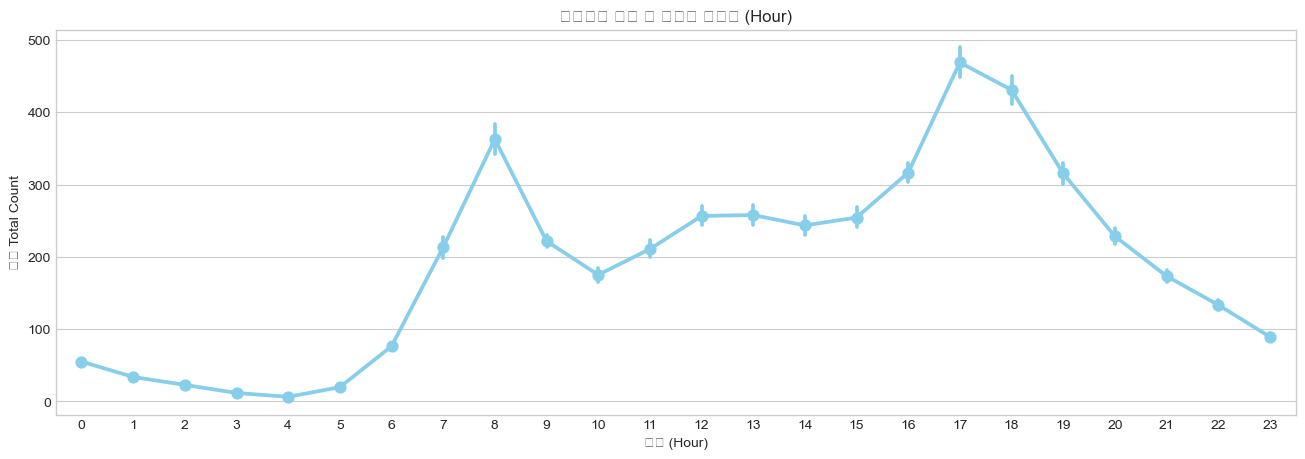

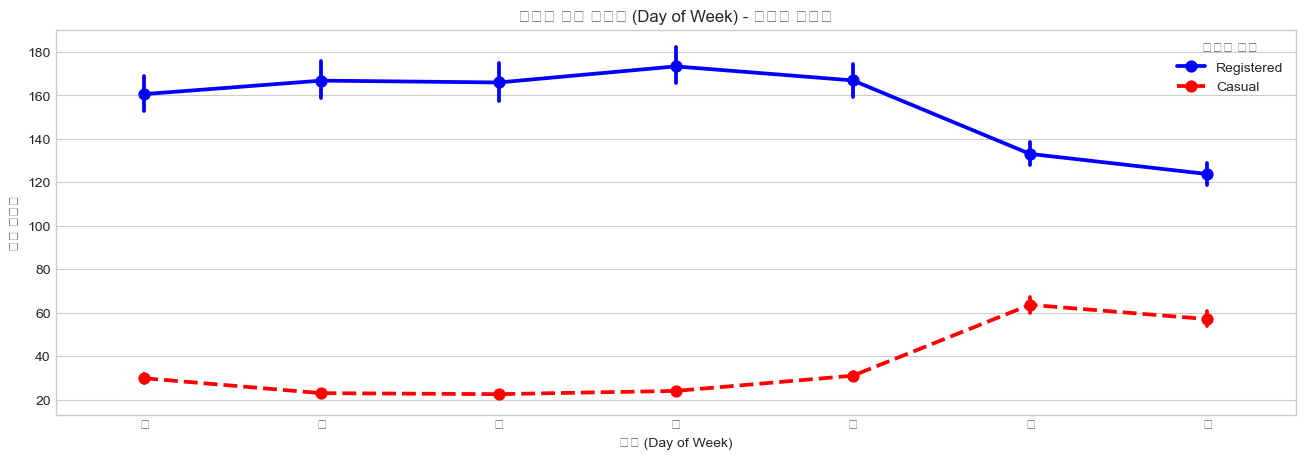

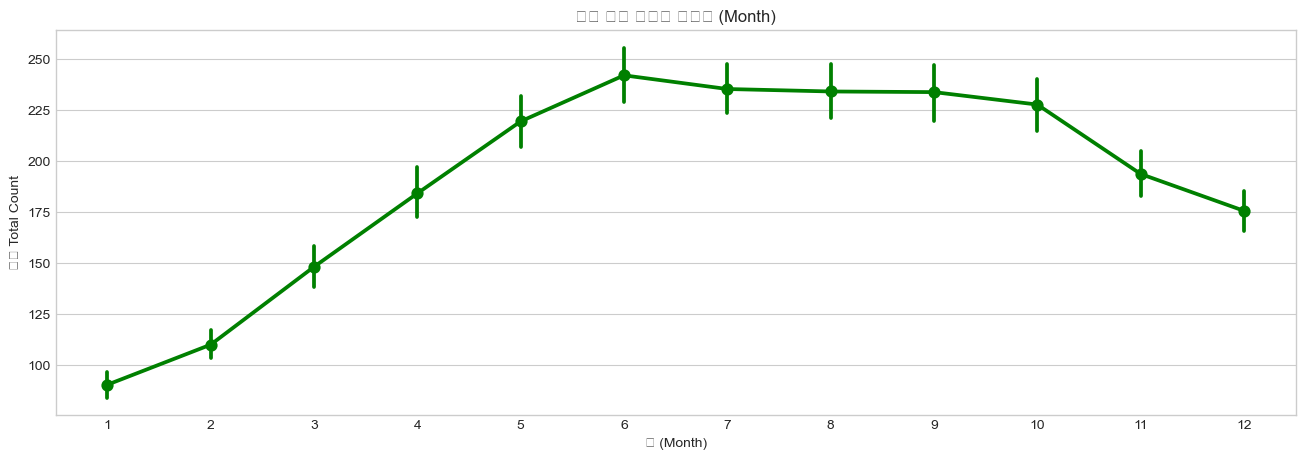

In [8]:
# =========================================================
# 3. 'datetime' 컬럼 전처리 및 특성 추출 (Feature Engineering)
# =========================================================

train['datetime'] = pd.to_datetime(train['datetime'])
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train['month'] = train['datetime'].dt.month

print("\n--- 추출된 시간 특성 (상위 5개) ---")
print(train[['datetime', 'hour', 'dayofweek', 'month']].head())

# =========================================================
# 4. 시각화를 통한 대여 패턴 분석 (Hour, Day of Week, Month)
# =========================================================

plt.style.use('seaborn-v0_8-whitegrid')

# 4-1. 시간대(Hour)별 패턴 분석 (총 대여량)
plt.figure(figsize=(16, 5))
sns.pointplot(x='hour', y='count', data=train, color='skyblue')
plt.title('시간대별 평균 총 자전거 대여량 (Hour)')
plt.ylabel('평균 Total Count')
plt.xlabel('시간 (Hour)')
plt.show()


# 4-2. 요일(Day of Week)별 패턴 분석 (등록/비등록 사용자 분리)
plt.figure(figsize=(16, 5))
sns.pointplot(x='dayofweek', y='registered', data=train, linestyles='-', color='blue', label='Registered')
sns.pointplot(x='dayofweek', y='casual', data=train, linestyles='--', color='red', label='Casual')

plt.title('요일별 평균 대여량 (Day of Week) - 사용자 유형별')
plt.gca().set_xticklabels(['월', '화', '수', '목', '금', '토', '일'])
plt.ylabel('평균 대여량')
plt.xlabel('요일 (Day of Week)')
plt.legend(title='사용자 유형')
plt.show()

# 4-3. 월(Month)별 패턴 분석
plt.figure(figsize=(16, 5))
sns.pointplot(x='month', y='count', data=train, color='green')
plt.title('월별 평균 자전거 대여량 (Month)')
plt.xlabel('월 (Month)')
plt.ylabel('평균 Total Count')
plt.show()